In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [894]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 4
    )

In [3]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

# Import data

In [4]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [6]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)

# Feature Engineering

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

In [7]:
gdp_df = pd.read_csv('Gdp_data.csv', skiprows=4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [439]:
def add_gdp(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
#     df[f'gdp_{2022}'] = 0
#     for year in years:
#         df[f'gdp_{year}'] = 0
    df['gdp'] = 0
    for c in list(set(train_data_ori.country)):
#         country_gdp = gdp_df.loc[gdp_df['Country Name']==c,'2017':'2022']
        for year in years:
            df['gdp'] = np.where(
                (df.country==c)&(df['Year']==year),np.log(gdp_df.loc[gdp_df['Country Name']==c, str(year)]/1e+9),df['gdp']
            )
    return df

In [390]:
country_gdp=gdp_df.loc[gdp_df['Country Name']=='Spain','2017':'2022']
# pd.DataFrame(preprocessing.normalize(country_gdp), columns=country_gdp.columns).mean().mean()
(country_gdp.mean().mean()/1e+9)

1371.8534565903847

Functions below provided by [RAVI RAMAKRISHNAN](https://www.kaggle.com/code/ravi20076/tpssep22-featureengineeringpipeline) on Kaggle and modified by me

In [788]:
def create_dateFeature(data):
    df = data.copy()
    df['Year'] = df.date.dt.year.astype(np.int16)
    df['Qtr'] = df['date'].dt.quarter.astype(np.int8)
    df["Month"] = df["date"].dt.month.astype(np.int8)
    df["Month_Sin"] = (np.sin(df['Month'] * (2 * np.pi / 12))).astype(np.float32)
    df["Day"] = df["date"].dt.day.astype(np.int16)
    df["Day_Sin"] = (np.sin(df['Day'] * (2 * np.pi / 12))).astype(np.float32)
    df["Weekday"] = df["date"].dt.dayofweek.astype(np.int8)
    df['Week_Nb'] = np.clip(df['date'].dt.isocalendar().week, a_min = 0, a_max= 52)
    df['Is_Weekend'] = np.where(df['Weekday'] >= 5,1,0)
    df["DayofYear"] = df["date"].dt.dayofyear
    df["is_fri"] = df["Weekday"]==4
    df["is_weekend"] = df["Weekday"]>4
    df["is_weekday"] = df["Weekday"]<4
    df['first_half'] = (df['Qtr']<3) 
    df['second_half'] = (df['Qtr']>2) 
    df["DayofYear"] = \
        df.apply(lambda x: x["DayofYear"]-1 
                 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  
                 else x["DayofYear"], axis=1)
    
    # covid dates
#     covid_concern = pd.Timestamp('2020-01-30')
    covid_pandemic = pd.Timestamp('2020-04-01')
#     arg_first_case = pd.Timestamp('2020-03-03')
#     can_first_case = pd.Timestamp('2020-01-27')
#     jp_first_case = pd.Timestamp('2020-01-16')
#     sp_first_case = pd.Timestamp('2020-01-31',)
#     es_first_case = pd.Timestamp('2020-02-27')
    
    df['world_covid'] = (df.date.dt.year==2020)
#     df['world_pandemic_covid'] = (df['date']==covid_pandemic)
        
    for day in (list(range(-5, 32))):
        df[f'covid_{day}'] = (df.date - covid_pandemic).dt.days.eq(day)
          
#     df.drop(['Day','Weekday'], axis=1, inplace=True)
        
    return df

In [120]:
def add_fourier(df):
    tempDf = df.copy()
    dayofyear = df.date.dt.dayofyear
    for k in range(1, 3):
        tempDf[f'sin{k}'] = np.sin(dayofyear / 365 * 2 * np.pi * k)
        tempDf[f'cos{k}'] = np.cos(dayofyear / 365 * 2 * np.pi * k)
        tempDf[f'IYC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'IYC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'TTL_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'TTL_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'WMKC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WMKC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WB_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Write Better']
        tempDf[f'WB_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Write Better']
    return tempDf

In [230]:
def make_features(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [440]:
train_eng = make_features(train_data_ori)
train_eng.set_index('date', drop=False, inplace=True)
train_eng.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin2,cos2,IYC_sin2,IYC_cos2,TTL_sin2,TTL_cos2,WMKC_sin2,WMKC_cos2,WB_sin2,WB_cos2
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000
2017-06-10,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326
2017-06-10,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
2017-06-10,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,-0.674444,0.738326,-0.000000,0.000000,-0.000000,0.000000,-0.674444,0.738326,-0.000000,0.000000


In [445]:
train_eng.loc[train_eng['gdp']>8]

,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin2,cos2,IYC_sin2,IYC_cos2,TTL_sin2,TTL_cos2,WMKC_sin2,WMKC_cos2,WB_sin2,WB_cos2
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,45,2017-01-01,167,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,46,2017-01-01,162,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,47,2017-01-01,26,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
2017-01-01,48,2017-01-01,163,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,3.442161e-02,0.999407,0.000000e+00,0.000000
2017-01-01,49,2017-01-01,119,2017,1,1,5.000000e-01,1,0.5,6,...,3.442161e-02,0.999407,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,3.442161e-02,0.999407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136930,2021-12-31,645,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
2021-12-31,136931,2021-12-31,648,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
2021-12-31,136932,2021-12-31,104,2021,4,12,-2.449294e-16,31,-0.5,4,...,-4.898587e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000


# Building Models

In [190]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso

In [446]:
X = train_eng.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng['num_sold'].values).reshape(-1,1)

In [447]:
features = list(X.columns)
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_weekend', 'is_weekday', 'first_half', 'second_half', 'world_covid', 'covid_-5', 'covid_-4', 'covid_-3', 'covid_-2', 'covid_-1', 'covid_0', 'covid_1', 'covid_2', 'covid_3', 'covid_4', 'covid_5', 'covid_6', 'covid_7', 'covid_8', 'covid_9', 'covid_10', 'covid_11', 'covid_12', 'covid_13', 'covid_14', 'covid_15', 'covid_16', 'covid_17', 'covid_18', 'covid_19', 'covid_20', 'covid_21', 'covid_22', 'covid_23', 'covid_24', 'covid_25', 'covid_26', 'covid_27', 'covid_28', 'covid_29', 'covid_30', 'covid_31', 'covid_32', 'covid_33', 'covid_34', 'covid_35', 'covid_36', 'covid_37', 'gdp', 'country_Argentina', 'country_Canada', 'country_Estonia', 'country_Spain', 'country_Japan', 'Using LLMs to Write Better', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Improve Your Coding', 'Using LLMs to Win Friends and Influence People', 'Using LLMs to Train More LLMs', 'store_Kaggl

In [448]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [864]:
def build_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

In [498]:
def resid_plot(country, store, product, model, f_eng_name, features):
    example_df = pd.DataFrame({'id': 0,
                            'date': pd.date_range('2017-01-01', '2022-12-31', freq='D'),
                            'country': country,
                            'store': store,
                            'product': product})
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    plt.figure(figsize=(20, 6))
    plt.plot(np.arange(len(example_df)), example_df.num_sold, label='prediction')
    ori_df = train_data_ori[(train_data_ori.country==country)&(train_data_ori.store==store)&(train_data_ori['product']==product)]
    plt.scatter(np.arange(len(ori_df)), ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('Predictions and true num_sold for 6 years')
    plt.show()

In [451]:
train_eng.columns[62:]

Index(['gdp', 'country_Argentina', 'country_Canada', 'country_Estonia',
       'country_Spain', 'country_Japan', 'Using LLMs to Write Better',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Improve Your Coding',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Train More LLMs', 'store_Kagglazon',
       'store_Kaggle Learn', 'store_Kaggle Store', 'sin1', 'cos1', 'IYC_sin1',
       'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1',
       'WB_cos1', 'sin2', 'cos2', 'IYC_sin2', 'IYC_cos2', 'TTL_sin2',
       'TTL_cos2', 'WMKC_sin2', 'WMKC_cos2', 'WB_sin2', 'WB_cos2'],
      dtype='object')

## Building Models without Holidays

adding date features ...
adding GDP features ...
adding dummies ...
adding fourier ...


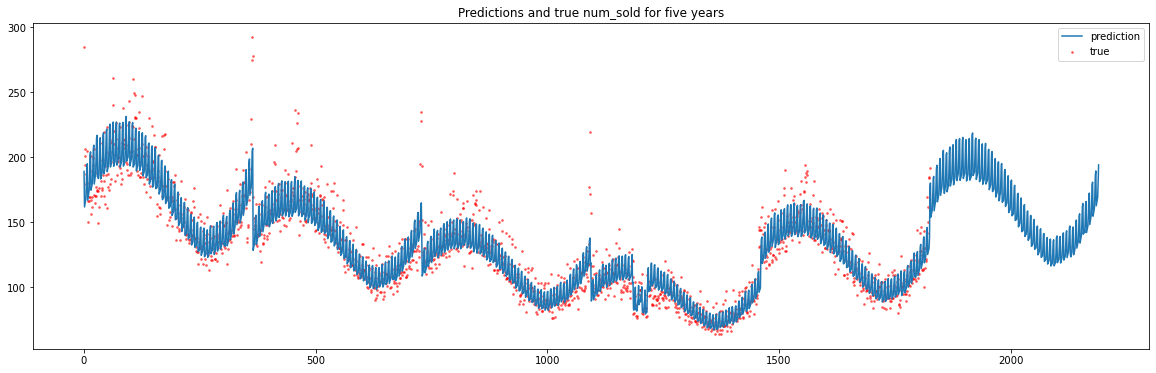

In [453]:
model1 = build_model(X_scaled, y.ravel())
resid_plot('Argentina', 'Kagglazon', 'Using LLMs to Write Better', model1, make_features, features)

Model adjust well to growth/decline with GDP feature.

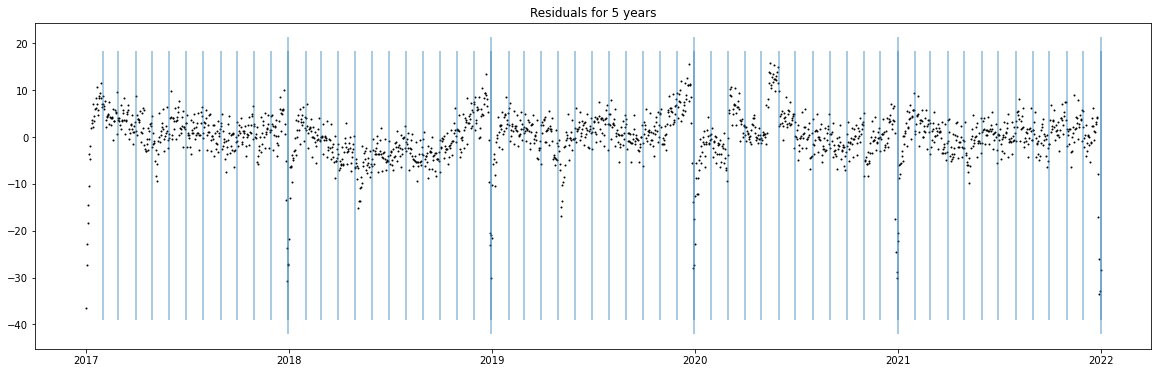

In [454]:
train_eng['pred'] = np.exp(model1.predict(scaler.transform(train_eng.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng.groupby(train_eng['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

def plot_all_residuals(residuals):
    plt.figure(figsize=(20,6))
    plt.scatter(residuals.index,
                residuals,
                s=1, color='k')
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='M'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='Y'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.title('Residuals for 5 years')
    plt.show()
    
plot_all_residuals(residuals)

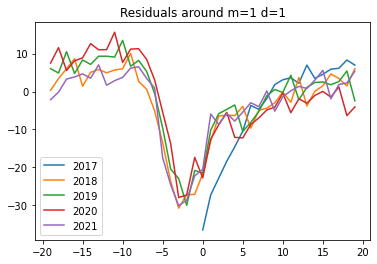

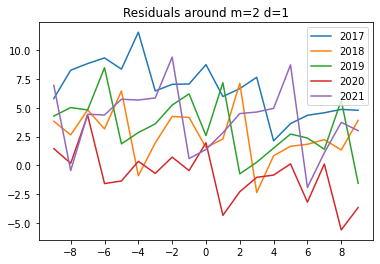

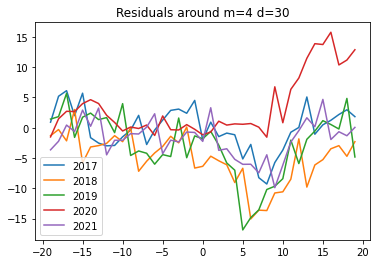

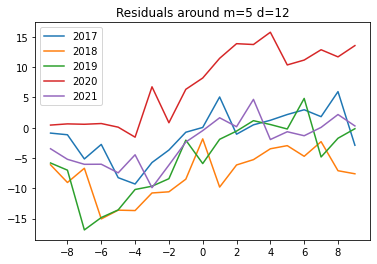

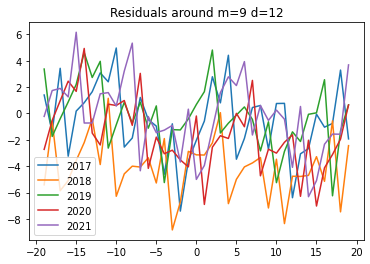

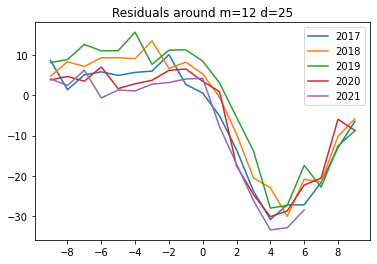

In [455]:
def plot_around(residuals, m, d, w):
    """Plot residuals in an interval of with 2*w around month=m and day=d"""
    plt.figure()
    plt.title(f"Residuals around m={m} d={d}")
    for y in np.arange(2017, 2022):
        d0 = pd.Timestamp(date(y, m, d))
        residual_range = residuals[(residuals.index > d0 - timedelta(w)) & 
                                   (residuals.index < d0 + timedelta(w))]
        plt.plot([(r - d0).days for r in residual_range.index], residual_range, label=str(y))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    plt.legend()
    plt.show()
plot_around(residuals, 1, 1, 20)
plot_around(residuals, 2, 1, 10)
plot_around(residuals, 4, 30, 20)
plot_around(residuals, 5, 12, 10)
plot_around(residuals, 9, 12, 20)
plot_around(residuals, 12, 25, 10)

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

High residuals mainly are located in:
- Early January (New Year). It is particularly higher in 2017.
- Around end of April to early May (Post-Easter/Golden week in Japan)

Additional interesting months from EDA:
- February (lowest sales of IYC, TTL, WFIP)
- March - May (Highest sales of WB)
- May (Highest sales of TTL in Japan)
- June (lowest sales of WMKC)
- July (lowest sales of WMKC in Estonia)
- September (lowest sales of WB)
- Japan does not consider Christmas as a national holiday
- Estonia has high sales during end of July.

We could use them as an interaction with addition of holidays such as Christmas and New Year that accomodates high sales during that time.

In [456]:
def eng_easter(data):
    df = data.copy()
    easter_date = df.date.apply(lambda date: pd.Timestamp(easter(date.year)))       
    for day in (list(range(-2, 11))+list(range(30,38))):
        df[f'Easter_{day}'] = (df.date - easter_date).dt.days.eq(day)
        
    for col in df.columns :
            if 'Easter' in col : df = pd.get_dummies(df, columns = [col], drop_first=True)
    
    return df

In [726]:
def holiday_mapper(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df[f'{i}_Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        df[f'Is_Holiday_{i}'] = np.where(df[f'{i}_Holiday']=='Not Holiday',0,1)
        df[f'{i}_Holiday'] = df[f'{i}_Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
    for i in list(set(train_data_ori['country'])):
        df.drop(f'{i}_Holiday', axis=1, inplace=True)
    
#     # Applying christmas and excluding Japan
#     df['is_christmas_ny'] = (
#         (df.country!='Japan') &
#         ((df.Month==12) & ((df.Day>=25) & (df.Day<=31)) | (df.Month==1) & (df.Day==1))
#     )
    newyear_date = df.date.apply(lambda date: pd.Timestamp(date.year,1,1))       
    for day in (list(range(-2,5))):
        df[f'newYear_{day}'] = (df.date - newyear_date).dt.days.eq(day)

    christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
    for day in (list(range(-5,7))):
        df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)
    
    return df

In [759]:
def add_jp_holiday(data):
    df = data.copy()
        
#     showa_day = df.date.apply(lambda date: pd.Timestamp(date.year,4,29))       
#     for day in (list(range(-2, 4))):
#         df[f'showa_{day}'] = np.where(df.country=='Japan',(df.date - showa_day).dt.days.eq(day),0)
    constitution_memorial_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,3)) 
    for day in (list(range(-2, 9))):
        df[f'constitution_{day}'] = np.where(df.country=='Japan',(df.date - constitution_memorial_day).dt.days.eq(day),0)
    greenery_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,4)) 
    for day in (list(range(-3, 8))):
        df[f'greenery_{day}'] = np.where(df.country=='Japan',(df.date - greenery_day).dt.days.eq(day),0)
    children_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,5)) 
    for day in (list(range(-4, 7))):
        df[f'children_{day}'] = np.where(df.country=='Japan',(df.date - children_day).dt.days.eq(day),0)
    
    return df

In [818]:
def add_es_holiday(data):
    df = data.copy()
    
    jaan_day = df.date.apply(lambda date: pd.Timestamp(date.year,6,24))
    for day in (list(range(7))):
        df[f'jaan_{day}'] = np.where(df.country=='Estonia',(df.date - jaan_day).dt.days.eq(day),0)
        
    return df

In [807]:
CountryHoliday('Estonia', years=range(2017, 2022, 1))

{datetime.date(2017, 1, 1): 'uusaasta', datetime.date(2017, 2, 24): 'iseseisvuspäev', datetime.date(2017, 4, 14): 'suur reede', datetime.date(2017, 4, 16): 'ülestõusmispühade 1. püha', datetime.date(2017, 5, 1): 'kevadpüha', datetime.date(2017, 6, 4): 'nelipühade 1. püha', datetime.date(2017, 6, 23): 'võidupüha', datetime.date(2017, 6, 24): 'jaanipäev', datetime.date(2017, 8, 20): 'taasiseseisvumispäev', datetime.date(2017, 12, 24): 'jõululaupäev', datetime.date(2017, 12, 25): 'esimene jõulupüha', datetime.date(2017, 12, 26): 'teine jõulupüha', datetime.date(2018, 1, 1): 'uusaasta', datetime.date(2018, 2, 24): 'iseseisvuspäev', datetime.date(2018, 3, 30): 'suur reede', datetime.date(2018, 4, 1): 'ülestõusmispühade 1. püha', datetime.date(2018, 5, 1): 'kevadpüha', datetime.date(2018, 5, 20): 'nelipühade 1. püha', datetime.date(2018, 6, 23): 'võidupüha', datetime.date(2018, 6, 24): 'jaanipäev', datetime.date(2018, 8, 20): 'taasiseseisvumispäev', datetime.date(2018, 12, 24): 'jõululaupäev

In [774]:
def add_trends(data):
    df = data.copy()
    df['feb_IYC'] = np.where((df.Month==2)&(df['Using LLMs to Improve Your Coding']==1), 1, 0)
    df['feb_TTL'] = np.where((df.Month==2)&(df['Using LLMs to Train More LLMs']==1), 1, 0)
    df['feb_WFIP'] = np.where((df.Month==2)&(df['Using LLMs to Win Friends and Influence People']==1), 1, 0)
    df['mar_WB'] = np.where((df.Month==3)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['apr_WB'] = np.where((df.Month==4)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['may_WB'] = np.where((df.Month==5)&(df['Using LLMs to Write Better']==1), 1, 0)
    df['jun_WMKC'] = np.where((df.Month==6)&(df['Using LLMs to Win More Kaggle Competitions']==1), 1, 0)
    df['jul_WMKC_Est'] = np.where(
                            df.Month==7, df['country_Estonia']*df['Using LLMs to Win More Kaggle Competitions'], 0)
    df['sept_WB'] = np.where((df.Month==9)&(df['Using LLMs to Write Better']==1), 1, 0)
    
    return df

In [816]:
def make_features2(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding easter features ...")
    tempDf = eng_easter(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    print("adding trends ...")    
    tempDf = add_trends(tempDf)
    print("adding Japan holiday ...")
    tempDf = add_jp_holiday(tempDf)
    print("adding Estonia holiday ...")
    tempDf = add_es_holiday(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [819]:
train_eng2 = make_features2(train_data_ori)
train_eng2.set_index('date', drop=False, inplace=True)
train_eng2.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,children_4,children_5,children_6,jaan_0,jaan_1,jaan_2,jaan_3,jaan_4,jaan_5,jaan_6
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
2017-06-10,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0


In [820]:
X = train_eng2.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [821]:
features = X.columns.to_list()
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_weekend', 'is_weekday', 'first_half', 'second_half', 'world_covid', 'covid_-5', 'covid_-4', 'covid_-3', 'covid_-2', 'covid_-1', 'covid_0', 'covid_1', 'covid_2', 'covid_3', 'covid_4', 'covid_5', 'covid_6', 'covid_7', 'covid_8', 'covid_9', 'covid_10', 'covid_11', 'covid_12', 'covid_13', 'covid_14', 'covid_15', 'covid_16', 'covid_17', 'covid_18', 'covid_19', 'covid_20', 'covid_21', 'covid_22', 'covid_23', 'covid_24', 'covid_25', 'covid_26', 'covid_27', 'covid_28', 'covid_29', 'covid_30', 'covid_31', 'gdp', 'Easter_-2_True', 'Easter_-1_True', 'Easter_0_True', 'Easter_1_True', 'Easter_2_True', 'Easter_3_True', 'Easter_4_True', 'Easter_5_True', 'Easter_6_True', 'Easter_7_True', 'Easter_8_True', 'Easter_9_True', 'Easter_10_True', 'Easter_30_True', 'Easter_31_True', 'Easter_32_True', 'Easter_33_True', 'Easter_34_True', 'Easter_35_True', 'Easter_36_True', 'Easter_37_True', 'Is_

In [822]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...


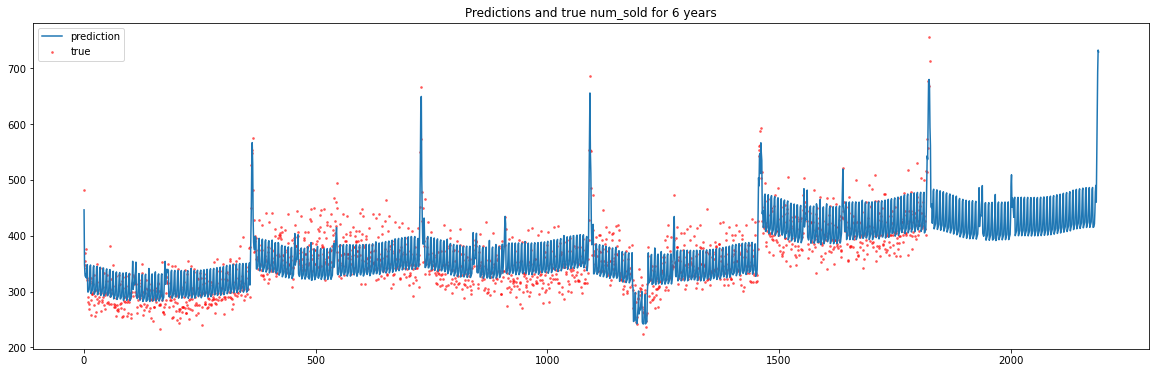

In [823]:
model2 = build_model(X_scaled, y.ravel())
resid_plot('Estonia', 'Kagglazon', 'Using LLMs to Train More LLMs', model2, make_features2, features)

In [824]:
train_eng2['pred'] = np.exp(model2.predict(scaler.transform(train_eng2.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng2.groupby(train_eng2['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

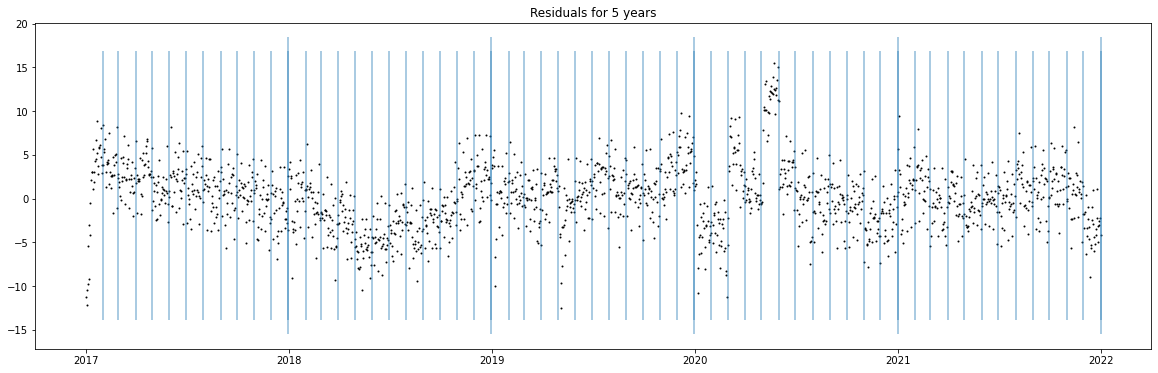

In [825]:
plot_all_residuals(residuals)

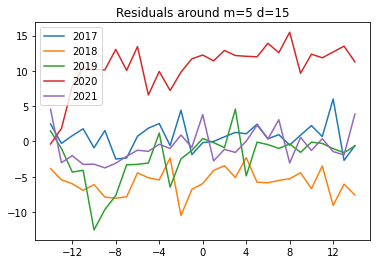

In [826]:
plot_around(residuals, 5, 15, 15)

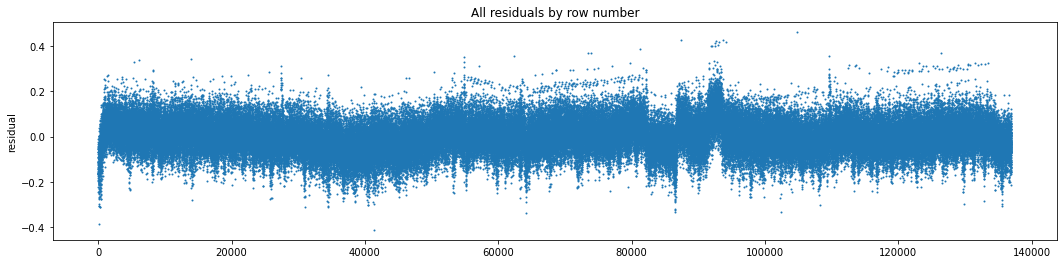

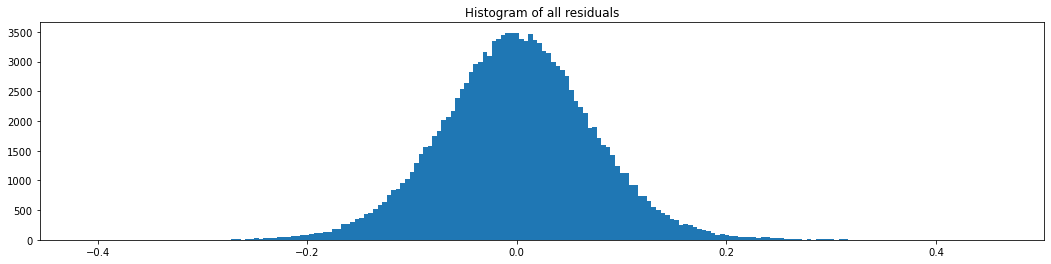

Standard deviation of log residuals: 0.072


In [827]:
residuals = np.log(train_eng2.pred) - np.log(train_eng2.num_sold)
plt.figure(figsize=(18, 4))
plt.scatter(np.arange(len(residuals)), residuals, s=1)
plt.title('All residuals by row number')
plt.ylabel('residual')
plt.show()
plt.figure(figsize=(18, 4))
plt.hist(residuals, bins=200)
plt.title('Histogram of all residuals')
plt.show()
print(f"Standard deviation of log residuals: {residuals.std():.3f}")

In [828]:
train_eng2['residuals'] = residuals

In [829]:
train_eng2['DayofYear'] = train_eng2.date.dt.dayofyear
train_eng2.loc[(train_eng2.date.dt.year != 2020) & (train_eng2.date.dt.month >= 3), 'DayofYear'] += 1

from scipy.stats import norm
print("Look for residuals beyond:", norm.ppf([0.5/365, 364.5/365]))

rr = train_eng2.residuals.groupby(train_eng2.DayofYear).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': pd.date_range('2020-01-01', '2020-12-31')})
rrdf[rrdf.z_score.abs() > 3]

Look for residuals beyond: [-2.99552527  2.99552527]
Standard deviation when grouped by dayofyear: 0.01362


,residual,z_score,date
DayofYear,,,
6,-0.076142,-5.589585,2020-01-06
7,-0.054551,-4.004601,2020-01-07
60,-0.085229,-6.256628,2020-02-29
126,-0.041175,-3.022668,2020-05-05


In [830]:
train_eng2['country'] = list(train_data_ori.country)
rr = train_eng2.residuals.groupby([train_eng2.country, train_eng2.DayofYear]).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by country and dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': np.datetime64('2018-12-31') + pd.to_timedelta(rr.index.get_level_values(1), 'D')})
rrdf[rrdf.z_score.abs() > 3]

Standard deviation when grouped by country and dayofyear: 0.02546


residual   z_score       date
country   DayofYear                               
Argentina 60        -0.175903 -6.908347 2019-03-01
          88        -0.077150 -3.029940 2019-03-29
          89        -0.076625 -3.009350 2019-03-30
          96        -0.081590 -3.204320 2019-04-06
          97        -0.085790 -3.369294 2019-04-07
          98        -0.098283 -3.859925 2019-04-08
          173       -0.082033 -3.221722 2019-06-22
          174       -0.090405 -3.550525 2019-06-23
          175       -0.093144 -3.658098 2019-06-24
          176       -0.097940 -3.846454 2019-06-25
          177       -0.105481 -4.142629 2019-06-26
Canada    6         -0.100248 -3.937082 2019-01-06
          7         -0.080181 -3.148986 2019-01-07
          187       -0.110299 -4.331830 2019-07-06
          188       -0.097487 -3.828676 2019-07-07
          189       -0.088662 -3.482078 2019-07-08
Estonia   1         -0.083994 -3.298758 2019-01-01
          6         -0.077058 -3.026342 2019-01-06
          59        -0.086486 -3.396608 2019-02-28
          60        -0.110304 -4.332042 2019-03-01
          237       -0.077081 -3.027238 2019-08-25
          238       -0.077014 -3.024634 2019-08-26
Japan     1          0.164164  6.447325 2019-01-01
          2          0.090191  3.542123 2019-01-02
          60        -0.137814 -5.412468 2019-03-01
          228       -0.091733 -3.602670 2019-08-16
          229       -0.086219 -3.386134 2019-08-17
          270       -0.078897 -3.098556 2019-09-27
          271       -0.096130 -3.775374 2019-09-28
          312       -0.080150 -3.147776 2019-11-08
          313       -0.086060 -3.379885 2019-11-09
Spain     10        -0.081766 -3.211233 2019-01-10
          233       -0.077005 -3.024271 2019-08-21
          310       -0.083250 -3.269514 2019-11-06
          345       -0.121077 -4.755112 2019-12-11
          346       -0.132901 -5.219493 2019-12-12
          347       -0.136035 -5.342582 2019-12-13
          348       -0.119664 -4.699632 2019-12-14

In [893]:
model1_smape = calculate_smape(np.array(train_eng.num_sold), np.array(train_eng.pred))
print(f'Model 1 SMAPE: {model1_smape}')

Model 1 SMAPE: 6.32


In [832]:
model2_smape = calculate_smape(np.array(train_eng2.num_sold), np.array(train_eng2.pred))
print(f'Model 2 SMAPE: {model2_smape}')

5.66

## Training and Validation

In [836]:
import pickle

In [900]:
def train_model(train, val):
    X_train = train[features]
    y_train = np.log(train['num_sold'])
    X_val = val[features]
    y_val = val['num_sold']
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_tr_scaled, y_train)
    
    y_hat = np.exp(model.predict(X_val_scaled))
#     print(y_hat)
    oof.update(pd.Series(y_hat, index=X_val.index))
    smape = calculate_smape(np.array(y_val),np.array(y_hat)) 
    print(f"Fold {run}.{fold} | {str(datetime.now() - start_time)[-12:-7]}"
          f" | SMAPE: {smape:.5f}")
    scores.append(smape)
    
    if fold == 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(y_val, y_hat, s=1, color='r')
        #plt.scatter(np.log(y_va), np.log(y_va_pred), s=1, color='g')
        plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
        plt.gca().set_aspect('equal')
        plt.xlabel('y_true')
        plt.ylabel('y_pred')
        plt.title('OOF Predictions')
        plt.show()
        
    return scaler, model

In [922]:

kf = GroupKFold(n_splits=5)
for fold, (train_idx, val_idx) in enumerate(kf.split(train_eng2, groups=train_eng2.date.dt.year)):
    train = train_eng2.iloc[train_idx]
    val = train_eng2.iloc[val_idx]
    if 2020 not in set(train.date.dt.year):
        train = train_eng2.iloc[np.r_[index_2020,train_idx]]
    else:
        val = train_eng2.iloc[np.r_[index_2020,val_idx]]


before:
{2017, 2018, 2019, 2021}
{2020}
after:
{2017, 2018, 2019, 2020, 2021}
{2020}
before:
{2017, 2018, 2019, 2020}
{2021}
after:
{2017, 2018, 2019, 2020}
{2020, 2021}
before:
{2017, 2018, 2020, 2021}
{2019}
after:
{2017, 2018, 2020, 2021}
{2019, 2020}
before:
{2017, 2019, 2020, 2021}
{2018}
after:
{2017, 2019, 2020, 2021}
{2018, 2020}
before:
{2018, 2019, 2020, 2021}
{2017}
after:
{2018, 2019, 2020, 2021}
{2017, 2020}


adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...
{2017, 2018, 2019, 2020, 2021}
Fold 0.0 | 00:15 | SMAPE: 6.15790


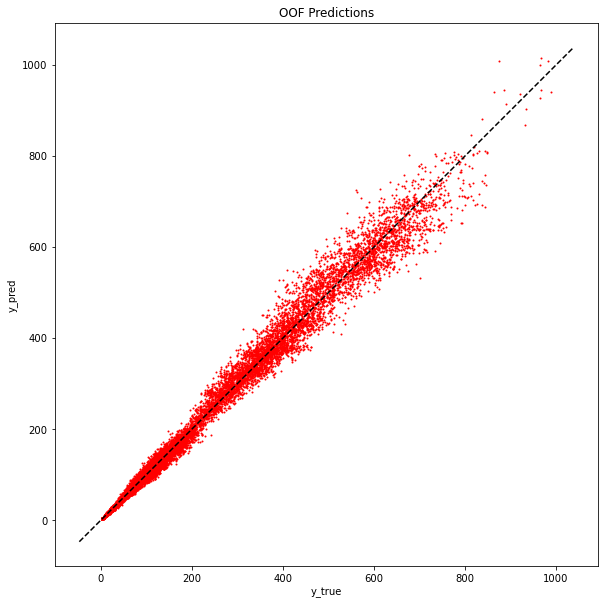

{2017, 2018, 2019, 2020}
Fold 0.1 | 00:18 | SMAPE: 5.79190
{2017, 2018, 2020, 2021}
Fold 0.2 | 00:20 | SMAPE: 5.82940
{2017, 2019, 2020, 2021}
Fold 0.3 | 00:23 | SMAPE: 6.41420
{2018, 2019, 2020, 2021}
Fold 0.4 | 00:25 | SMAPE: 6.13490
Average SMAPE: 6.06566


In [925]:
runs = 1
np.random.seed(5)
start_time = datetime.now()
train_eng2 = make_features2(train_data_ori)
index_2020 = train_eng2.loc[train_eng2['date'].dt.year==2020].index
train_eng2_excovid = train_eng2.loc[train_eng2['date'].dt.year!=2020]
oof = pd.Series(0.0, index=train_eng2.index)
scores = []

for run in range(runs):
    kf = GroupKFold(n_splits=5)
    for fold, (train_idx, val_idx) in enumerate(kf.split(train_eng2, groups=train_eng2.date.dt.year)):
        train = train_eng2.iloc[train_idx]
        val = train_eng2.iloc[val_idx]
        if 2020 not in set(train.date.dt.year):
            train = train_eng2.iloc[np.r_[index_2020,train_idx]]
        else:
            val = train_eng2.iloc[np.r_[index_2020,val_idx]]
        print(set(train.date.dt.year))
#         print(f"Fold {run}.{fold}")
        train_model(train, val)

print(f"Average SMAPE: {sum(scores) / len(scores):.5f}")
with open('oof.pickle', 'wb') as handle: 
    pickle.dump(oof, handle)

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...


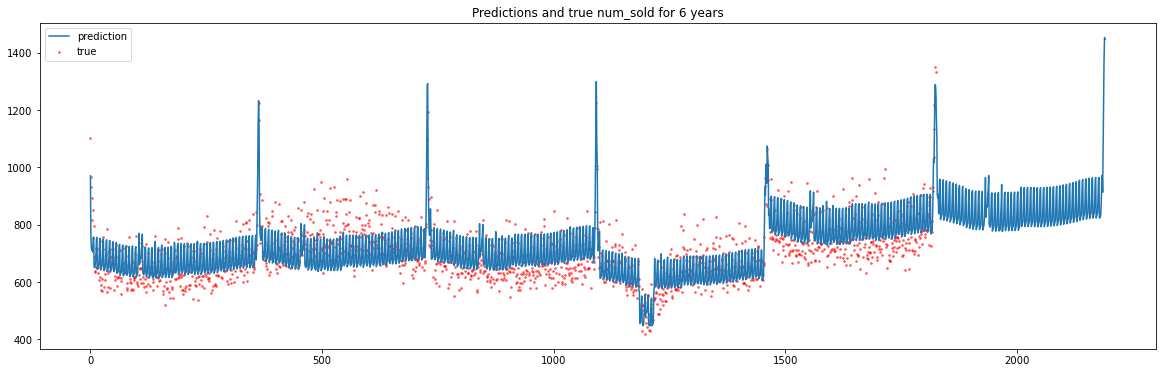

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...


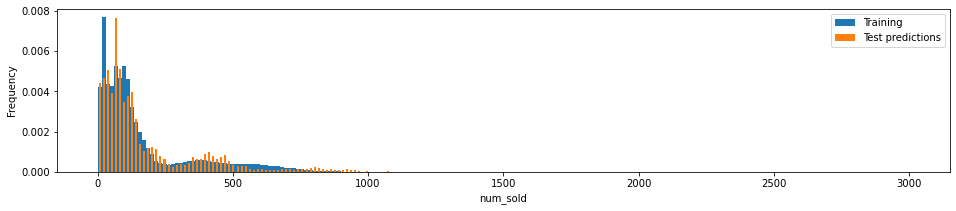

,id,num_sold
0,136950,50.874469
1,136951,50.762420
2,136952,7.744505
3,136953,47.440484
4,136954,38.607333
...,...,...
27370,164320,750.432119
27371,164321,746.946349
27372,164322,113.957936
27373,164323,698.015748


In [926]:
X_train = train_eng2[features]
y_train = np.log(train_eng2['num_sold'])

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

modelLR = build_model(X_tr_scaled, y_train)
# Quick check for debugging
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Train More LLMs', modelLR, make_features2, features) 

# Inference for test
test_hat_list = []
test_hat_list.append(np.exp(modelLR.predict(scaler.transform(make_features2(test_data_ori)[features]))))

# Create the submission file
sub5 = test_data_ori[['id']].copy()
sub5['num_sold'] = sum(test_hat_list) / len(test_hat_list)
sub5.to_csv('submissions/submission5.csv', index=False)

# Plot the distribution of the test predictions
plt.figure(figsize=(16,3))
plt.hist(train_eng2['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, label='Training')
plt.hist(sub5['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, rwidth=0.5, label='Test predictions')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sub5

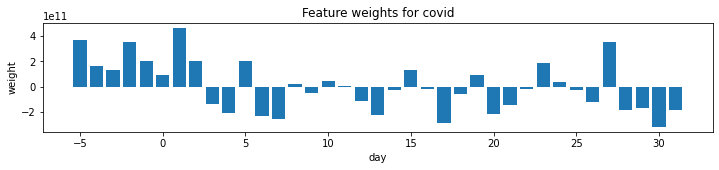

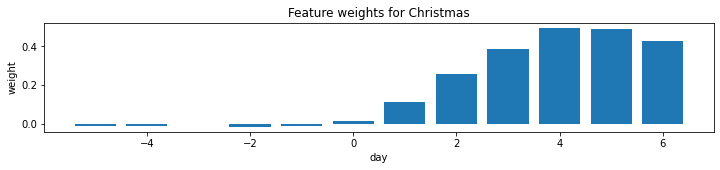

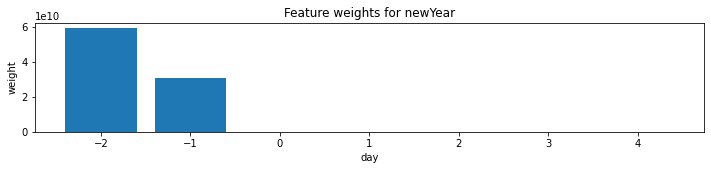

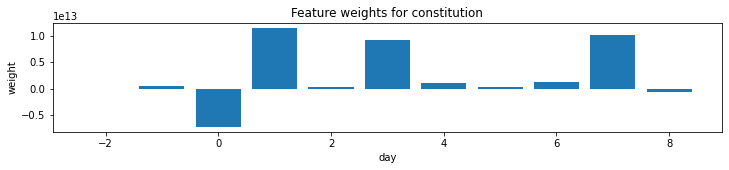

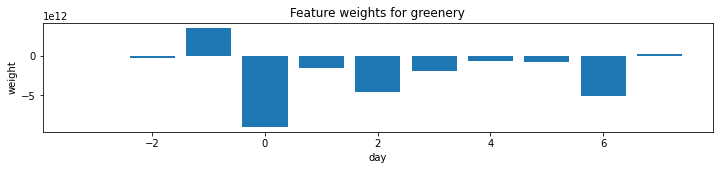

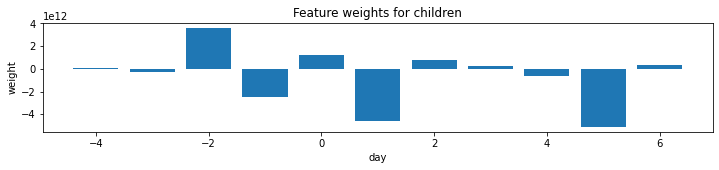

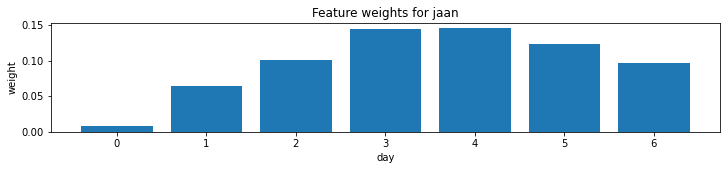

In [878]:
weights = pd.Series(modelLR.coef_, features)
weights_scaled = weights / scaler.scale_

def plot_feature_weights_numbered(prefix):
    prefix_features = [f for f in features if f.startswith(prefix)]
    plt.figure(figsize=(12, 2))
    plt.bar([int(f[len(prefix)+1:]) for f in prefix_features], weights_scaled[prefix_features])
    plt.title(f'Feature weights for {prefix}')
    plt.ylabel('weight')
    plt.xlabel('day')
    plt.show()
    
plot_feature_weights_numbered('covid')
plot_feature_weights_numbered('Christmas')
plot_feature_weights_numbered('newYear')
plot_feature_weights_numbered('constitution')
plot_feature_weights_numbered('greenery')
plot_feature_weights_numbered('children')
plot_feature_weights_numbered('jaan')

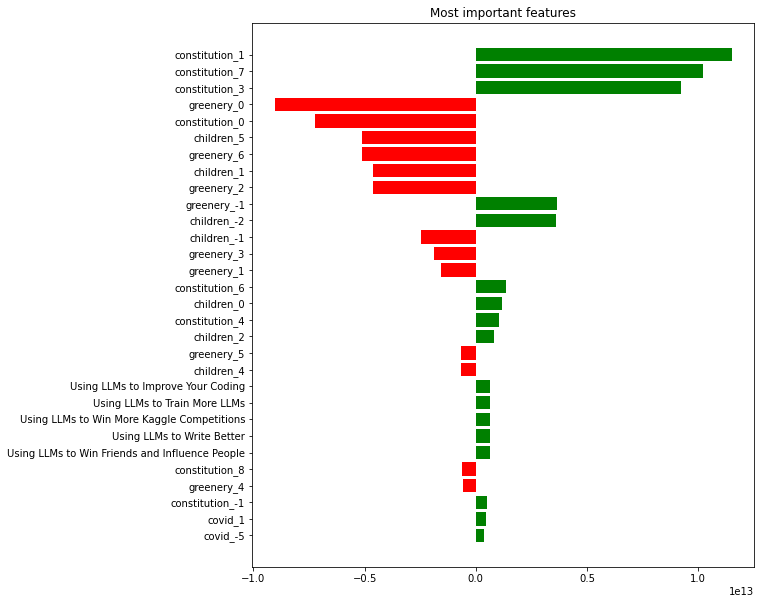

In [882]:
ws_sorted = weights_scaled.iloc[np.argsort(-np.abs(weights_scaled))]
ws_plot = ws_sorted.head(30)
plt.figure(figsize=(9, len(ws_plot) / 3))
plt.barh(np.arange(len(ws_plot)), ws_plot, color=ws_plot.apply(lambda ws: 'green' if ws >= 0 else 'red'))
plt.yticks(np.arange(len(ws_plot)), ws_plot.index)
plt.gca().invert_yaxis()
plt.title('Most important features')
plt.show()

In [898]:
pickle.load(open('oof.pickle','rb'))

0          56.298278
1          55.940661
2           8.557451
3          52.552490
4          42.811503
             ...    
136945    738.552849
136946    732.844522
136947    111.869977
136948    687.949147
136949    557.464719
Length: 136950, dtype: float64

In [927]:
sub5.num_sold

0         50.874469
1         50.762420
2          7.744505
3         47.440484
4         38.607333
            ...    
27370    750.432119
27371    746.946349
27372    113.957936
27373    698.015748
27374    565.914412
Name: num_sold, Length: 27375, dtype: float64

# Submissions

In [865]:
test_eng = make_features2(test_data_ori)
test_eng

adding date features ...
adding GDP features ...
adding easter features ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding trends ...
adding Japan holiday ...
adding Estonia holiday ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,children_4,children_5,children_6,jaan_0,jaan_1,jaan_2,jaan_3,jaan_4,jaan_5,jaan_6
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0


In [489]:
y_hat = np.exp(model2.predict(scaler.transform(test_eng[features])))

In [816]:
sub1 = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub1

,id,num_sold
0,136950,46.497919
1,136951,46.341807
2,136952,7.071841
3,136953,43.450334
4,136954,35.207637
...,...,...
27370,164320,684.534733
27371,164321,680.569199
27372,164322,103.848215
27373,164323,637.998232


In [817]:
sub1.to_csv('submissions/submission1.csv', index=False)

In [471]:
sub2 = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub2

,id,num_sold
0,136950,39.225350
1,136951,38.989557
2,136952,5.963445
3,136953,36.570019
4,136954,29.794929
...,...,...
27370,164320,514.978046
27371,164321,510.627451
27372,164322,78.123851
27373,164323,479.140724


In [472]:
sub2.to_csv('submissions/submission2.csv', index=False)

In [490]:
sub3 = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub3

,id,num_sold
0,136950,45.987779
1,136951,45.798386
2,136952,6.999570
3,136953,42.888044
4,136954,34.914892
...,...,...
27370,164320,766.744460
27371,164321,761.683020
27372,164322,116.411088
27373,164323,713.252609


In [491]:
sub3.to_csv('submissions/submission3.csv', index=False)

In [896]:
sub

,id,num_sold
0,136950,50.955845
1,136951,50.636510
2,136952,7.745007
3,136953,47.612169
4,136954,38.699561
...,...,...
27370,164320,753.898145
27371,164321,747.412307
27372,164322,114.306205
27373,164323,702.627893
